In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
#read csv file
df_Aramco = pd.read_csv('Aramco Historical Data.csv', parse_dates=True)
df_Sabic = pd.read_csv('Sabic Historical Data.csv', parse_dates=True)
df_STC = pd.read_csv('STC Historical Data.csv', parse_dates=True)
df_Almarai = pd.read_csv('Almarai Historical Data.csv', parse_dates=True)

#merge the prices 
df_merged = pd.merge(df_Aramco, df_Sabic, on="Date", how="inner")
df_merged = df_merged[["Date", "Price_x", "Price_y"]]
df_merged = df_merged.rename(columns= {"Price_x": "Aramco", "Price_y": "Sabic"})
df_merged = pd.merge(df_merged, df_STC, on="Date", how="inner")
df_merged = df_merged[["Date", "Aramco", "Sabic", "Price"]]
df_merged = df_merged.rename(columns= {"Price": "STC"})
df_merged = pd.merge(df_merged, df_Almarai, on="Date", how="inner")
df_merged = df_merged[["Aramco", "Sabic","STC", "Price"]]
df_merged = df_merged.rename(columns= {"Price": "Almarai"})

#Calculate the return 
df_merged["Aramco_return"] = (df_merged.Aramco-df_merged.Aramco.shift(1)) / (df_merged.Aramco.shift(1))
df_merged

df_merged["Sabic_return"] = (df_merged.Sabic-df_merged.Sabic.shift(1)) / (df_merged.Sabic.shift(1))
df_merged

df_merged["STC_return"] = (df_merged.STC-df_merged.STC.shift(1)) / (df_merged.STC.shift(1))
df_merged

df_merged["Almarai_return"] = (df_merged.Almarai-df_merged.Almarai.shift(1)) / (df_merged.Almarai.shift(1))
df_merged

#The columns we want to show in the output
df_merged = df_merged[["Aramco_return", "Sabic_return", "STC_return" , "Almarai_return"]]


df=df_merged.dropna()
df

,Aramco_return,Sabic_return,STC_return,Almarai_return
1,0.009333,-0.015480,-0.003436,-0.018832
2,-0.006605,-0.003145,-0.010345,0.007678
3,0.007979,0.007886,0.012195,0.003810
4,-0.003958,0.000000,-0.010327,0.009488
5,0.003974,-0.007825,0.001739,-0.005639
...,...,...,...,...
246,-0.001416,-0.007299,-0.007505,-0.012821
247,0.007092,0.008403,0.003781,0.003711
248,-0.004225,-0.001042,-0.022599,0.007394
249,0.004243,0.001043,0.019268,0.007339


In [3]:
matrix_of_return_values = df.to_numpy()
matrix_of_return_values= np.asmatrix(matrix_of_return_values)
matrix_of_return_values= matrix_of_return_values.T
print(matrix_of_return_values)

[[ 0.00933333 -0.00660502  0.00797872 -0.00395778  0.00397351 -0.00395778
  -0.0013245  -0.00795756  0.0013369  -0.00133511  0.0013369  -0.00534045
   0.00536913 -0.00133511  0.         -0.0026738  -0.0080429   0.00540541
  -0.00537634 -0.00135135  0.00541272  0.00403769 -0.00670241 -0.01754386
  -0.00961538 -0.00138696  0.          0.00972222 -0.0343879   0.
  -0.0042735  -0.00143062  0.00286533  0.          0.00428571  0.
  -0.0056899   0.00286123 -0.00285307  0.          0.00429185  0.
   0.          0.          0.         -0.002849    0.00428571 -0.00284495
  -0.0042796  -0.00143266 -0.00143472  0.         -0.00862069  0.0115942
   0.00143266  0.00286123  0.00570613 -0.0070922   0.01       -0.00424328
   0.00142045 -0.00283688  0.          0.         -0.00284495 -0.00285307
   0.00429185 -0.0042735  -0.00429185  0.00143678  0.00143472 -0.00573066
   0.00144092  0.00431655  0.          0.00286533 -0.00714286 -0.0057554
   0.00144718  0.00722543  0.00286944  0.          0.          0

In [12]:
no_of_portfolios = 1000

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [13]:
no_of_asset_classes = 4

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights

In [14]:
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
random_asset_weights = get_random_asset_weights(4)
print(get_portfolio_statistics(random_asset_weights, matrix_of_return_values))

(-0.00046988455990567093, 0.008343893300398067, -0.05631478531529806)


In [15]:
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights)
    a,b,c = get_portfolio_statistics(random_asset_weights, matrix_of_return_values)
    portfolio_means.append(a)
    portfolio_standard_deviations.append(b)
    portfolio_sharpe_ratios.append(c)

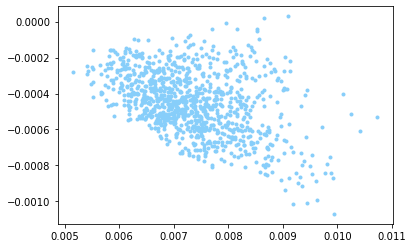

In [16]:
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [17]:
index =  portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

In [10]:
print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.1035207  0.00336946 0.02984194 0.8632679 ]]
0.0065192913508663386


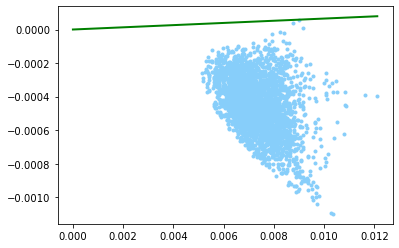

In [11]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.show()